In [1]:
%matplotlib notebook

Light intensity measurements done on a standard arena using red LED strips.

Intensity was measured with ThorLabs PM100D using the S130VC sensor.

Wavelength was set to 625nm and diameter of sensor to 9.5mm  (not relevant as I didn't write down  the uW/mm2 anyways)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from pathlib import Path
import os

In [3]:
home_path = os.getcwd()
target_path = Path('plots/Fig1S2/')
os.makedirs(target_path, exist_ok=True)

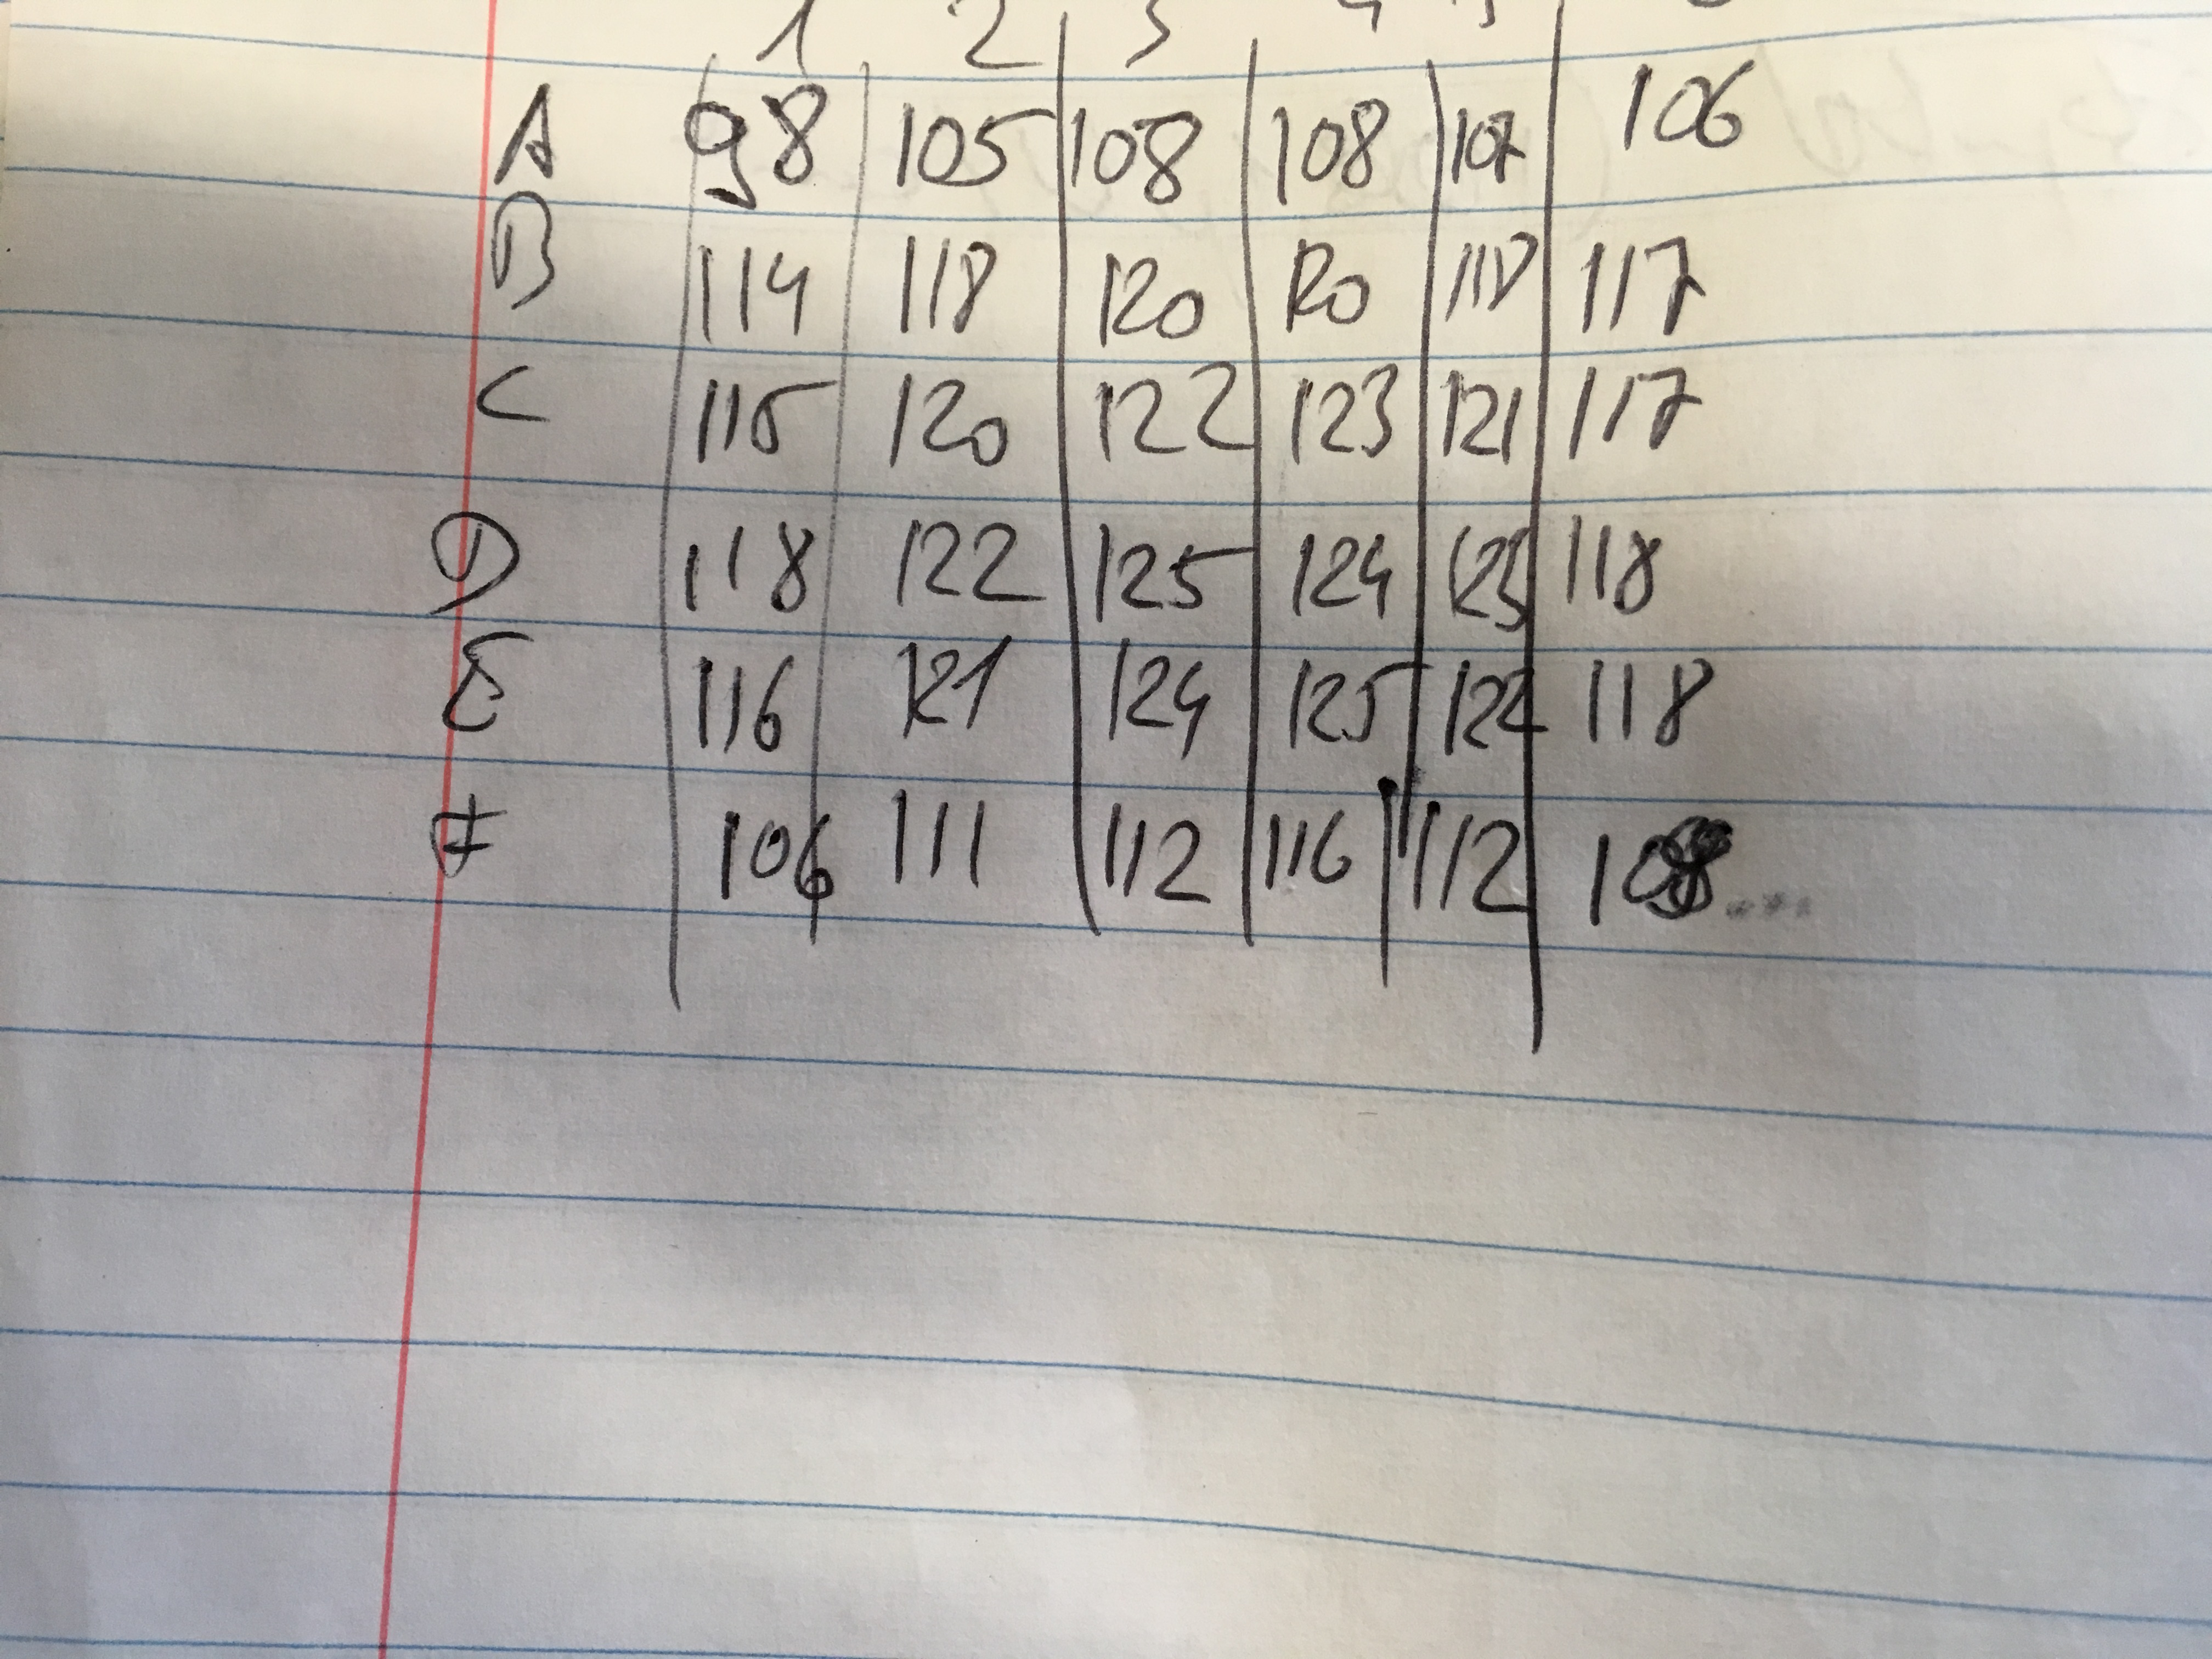

In [4]:
Image(filename = home_path + '/data/190513 - LP measurement_arena#2.JPG' , width=500, height=500)

In [5]:
uW = pd.DataFrame({
    '1' : [98,105,108,108,107,106],
    '2' : [114,118,120,120,118,117],
    '3' : [115,120,122,123,121,117],
    '4' : [118,122,125,124,125,118],
    '5' : [116,121,124,125,122,118],
    '6' : [106,111,112,116,112,109]
                  })
uW.rename({
    0: 'A', 
    1: 'B',
    2: 'C',
    3: 'E',
    4: 'F',
    5: 'G',
    6: 'H'
})
mW = uW/1000

In [6]:
# Step by step calculation of light intensity per area from the absolute measured intensity:
# Take the raw uW (or whatever).
# The sensory diameter is 9.5mm, radius is therefore 4.75
# Sensor area is pi*radius^2
sensor_area = np.pi * 4.75**2
# uW per mm2 is therefore just the measured uW divided by that area
mW_per_mm = mW / sensor_area
uW_per_mm = mW_per_mm * 1000

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plot = ax.imshow(uW_per_mm, cmap='Reds', vmin = 0, vmax = uW_per_mm.values.max())

# get the colorbar exactly the same size as the resulting window!
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad='1%')

# add colormap to explain the heatmap, control how many ticks using the ticks parameter
cbar=fig.colorbar(plot, 
                  orientation="horizontal", 
                  ticks=[0,
                         round(uW_per_mm.values.max(),3)], 
                  cax=cax,
                  fraction=0.046, 
                  pad=0.04)

ticklabs = cbar.ax.get_xticklabels()
cbar.ax.set_xticklabels([0,
                         round(uW_per_mm.values.max(),1)], fontsize=20)
cbar.ax.get_xaxis().labelpad = -40

# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           2.5, '5cm', 
                           'lower right',
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=0.25,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# Add a circle to indicate where a 90mm petri dish would be
petriDish_outline = plt.Circle((2.5, 2.5), 2.25, color='k', fill=False)
ax.add_artist(petriDish_outline)

ax.axis('off')

# Uncomment next line to save the plot
# fig.savefig(Path(target_path,'Fig1S2ci_LowPowerLightIntensityArena2.eps'))

<IPython.core.display.Javascript object>

(-0.5, 5.5, 5.5, -0.5)